Alvin Aditiya 3F 04 2341720020

#**Tugas Pratikum**

1. Buatlah scatterplot berdasarkan dataset menggunakan dua variabel, yaitu Avg_Credit_Limit dan Total_credit_card. Apakah sebaran data dapat dikatakan linier?

**Import library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

**Load dataset**

In [2]:
df = pd.read_csv("CC_Customer_Dataset.csv")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
print(df.columns)


Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')


**Scatterplot Avg_Credit_Limit vs Total_Credit_Card**

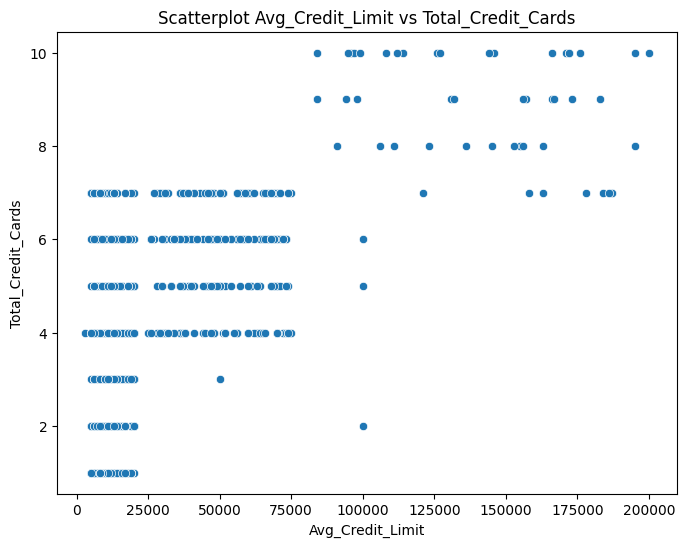

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Avg_Credit_Limit", y="Total_Credit_Cards", data=df)
plt.title("Scatterplot Avg_Credit_Limit vs Total_Credit_Cards")
plt.show()


sebaran data tidak bersifat linier. Nilai Avg_Credit_Limit tidak memiliki hubungan garis lurus dengan Total_Credit_Cards, karena penyebaran titik lebih acak dan membentuk beberapa kelompok (cluster) daripada pola garis.

2. Buatlah model klasterisasi dengan menggunakan model K-Means. Tentukan jumlah
k
k yang terbaik dengan menggunakan elbow method. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.

**K-Means Clustering dengan Elbow Method**

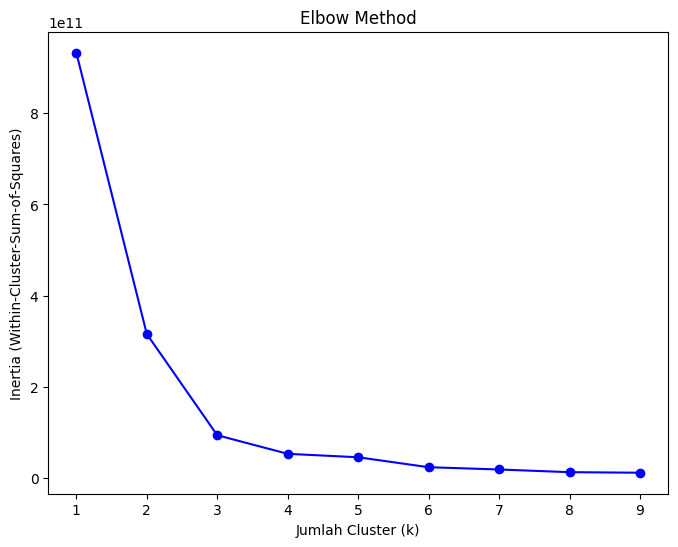

In [6]:

X = df[["Avg_Credit_Limit", "Total_Credit_Cards"]]

distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, distortions, 'bo-')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia (Within-Cluster-Sum-of-Squares)")
plt.title("Elbow Method")
plt.show()

jumlah cluster terbaik adalah k=3 pada titik k=3 grafik menunjukkan perubahan paling signifikan (elbow), setelah itu penurunan inertia relatif kecil, 3 cluster paling optimal untuk menggambarkan struktur data tanpa menambah kompleksitas berlebih.

3. Gambarkan hasil klasterisasi dengan model K-Means dengan menggunakan scatterplot.

**Visualisasi K-Means dengan scatterplot**

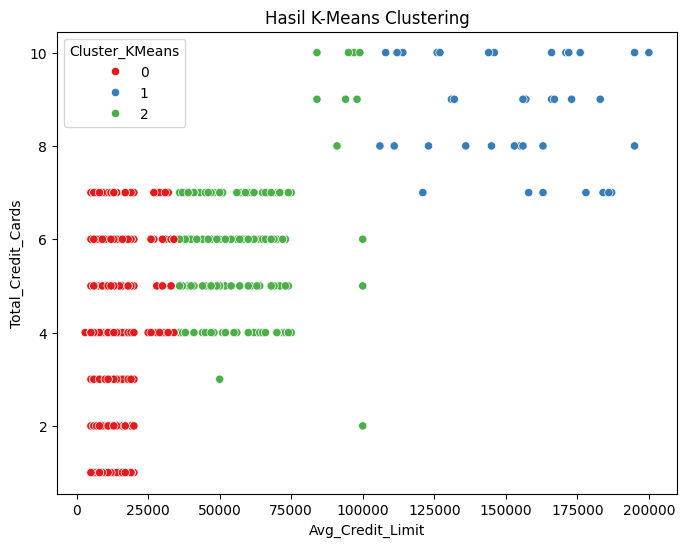

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster_KMeans"] = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Avg_Credit_Limit",
    y="Total_Credit_Cards",
    hue="Cluster_KMeans",
    palette="Set1",
    data=df
)
plt.title("Hasil K-Means Clustering")
plt.show()


4. Buatlah model klasterisasi dengan menggunakan DBSCAN dengan seluruh variabel yang dapat digunakan

**DBSCAN dengan semua variabel**

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.dropna().select_dtypes(include='number'))

dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

df["Cluster_DBSCAN"] = labels


5. Tentukan jumlah
k
k yang terbaik dengan menggunakan elbow method. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.

**Evaluasi DBSCAN**

In [11]:
silhouette = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else "Tidak valid (1 cluster)"
dbi = davies_bouldin_score(X_scaled, labels) if len(set(labels)) > 1 else "Tidak valid (1 cluster)"

print("Hasil Evaluasi DBSCAN")
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", dbi)

Hasil Evaluasi DBSCAN
Silhouette Score: 0.3100461731260327
Davies-Bouldin Index: 1.665111196544607


6. Tentukan nilai silhouette score dan DBI dari model DBSCAN.

**Visualisasi DBSCAN**

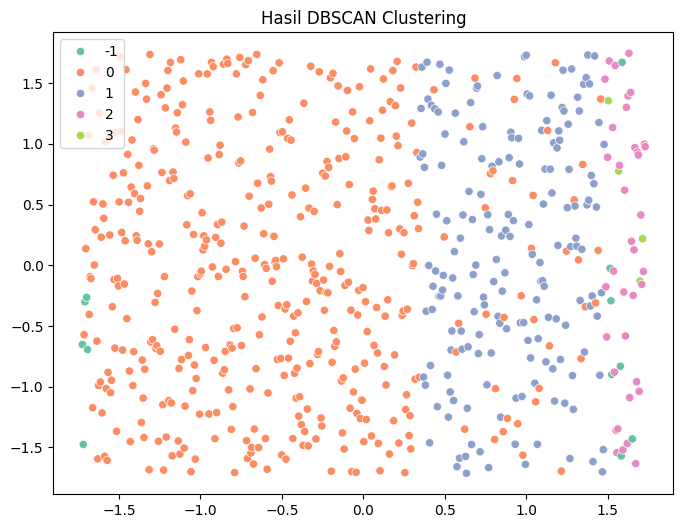

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette="Set2")
plt.title("Hasil DBSCAN Clustering")
plt.show()
